A practical introduction to Pandas
===================

We have been asked to *analyze an otp dataset*, without much more information. This kind of scenario is more common than you might imagine!

## 1) Quickly examine the files in ~/Data/us_dot/otp. What do they contain, in both technical and functional terms? (Use any tool you want)

In [1]:
path_to_zips = '/home/dsc/Data/us_dot/otp/'

For this example, we are going to begin using the shell from within this notebook, with the ! notation:

A ! sign before a line tells the notebook to send that line straight away to the underlying OS. 

\* Note that we can substitute python variables into the shell command. We do that by surrounding the name of the variable with curly braces ({}). That's what we are going to do with the `path_to_files` variable

### Check what the files contain

In [2]:
# ls the folder
! ls {path_to_zips}

On_Time_On_Time_Performance_2015_1.zip	On_Time_On_Time_Performance_2015_5.zip
On_Time_On_Time_Performance_2015_2.zip	On_Time_On_Time_Performance_2015_6.zip
On_Time_On_Time_Performance_2015_3.zip	On_Time_On_Time_Performance_2015_7.zip
On_Time_On_Time_Performance_2015_4.zip	On_Time_On_Time_Performance_2015_8.zip


In [3]:
# check the contents of one of the files with a shell command
# Alternativas:
# ! zcat {path_to_zips}On_Time_On_Time_Performance_2015_1.zip | head -n 3
# ! zipinfo {path_to_zips}On_Time_On_Time_Performance_2015_1.zip

! unzip -v {path_to_zips}On_Time_On_Time_Performance_2015_1.zip


Archive:  /home/dsc/Data/us_dot/otp/On_Time_On_Time_Performance_2015_1.zip
 Length   Method    Size  Cmpr    Date    Time   CRC-32   Name
--------  ------  ------- ---- ---------- ----- --------  ----
211633432  Defl:N 23058756  89% 04-16-2015 20:02 731a9a16  On_Time_On_Time_Performance_2015_1.csv
   12054  Defl:N     2208  82% 04-16-2015 20:02 dd78b2d3  readme.html
--------          -------  ---                            -------
211645486         23060964  89%                            2 files


Oh, it has a readme! Always good to read it.

### Unzip the readme to the current directory

In [4]:
# use the shell #Pregunta: ¿Qué pasa cuando ya existe y te pregunta sobreescribir? Poner unzip -o
! unzip -o {path_to_zips}On_Time_On_Time_Performance_2015_1.zip readme.html

Archive:  /home/dsc/Data/us_dot/otp/On_Time_On_Time_Performance_2015_1.zip
  inflating: readme.html             


The readme file is html. Luckily, we are working in an html environment. 

### Display the contents of `readme.html` within the notebook
(Hint: check out [IPython.display.IFrame](https://ipython.org/ipython-doc/3/api/generated/IPython.display.html))

In [5]:
from IPython.display import IFrame, HTML

IFrame('readme.html', 800, 600)


In [6]:
HTML('readme.html')

In [7]:
#IFrame('http://www.elpais.es', 800, 600)

That's some very good documentation!

### Summary: 

The files within the zip are " quoted csv's. They contain information on timeliness of departures in the US, at the departure level.

In [8]:
# have a look at the beginning of one of the files to see what they look like
#On the fly, usar los datos sin descomprimir el archivo:
# 
! zcat {path_to_zips}On_Time_On_Time_Performance_2015_1.zip | head -n 3          

"Year","Quarter","Month","DayofMonth","DayOfWeek","FlightDate","UniqueCarrier","AirlineID","Carrier","TailNum","FlightNum","OriginAirportID","OriginAirportSeqID","OriginCityMarketID","Origin","OriginCityName","OriginState","OriginStateFips","OriginStateName","OriginWac","DestAirportID","DestAirportSeqID","DestCityMarketID","Dest","DestCityName","DestState","DestStateFips","DestStateName","DestWac","CRSDepTime","DepTime","DepDelay","DepDelayMinutes","DepDel15","DepartureDelayGroups","DepTimeBlk","TaxiOut","WheelsOff","WheelsOn","TaxiIn","CRSArrTime","ArrTime","ArrDelay","ArrDelayMinutes","ArrDel15","ArrivalDelayGroups","ArrTimeBlk","Cancelled","CancellationCode","Diverted","CRSElapsedTime","ActualElapsedTime","AirTime","Flights","Distance","DistanceGroup","CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay","FirstDepTime","TotalAddGTime","LongestAddGTime","DivAirportLandings","DivReachedDest","DivActualElapsedTime","DivArrDelay","DivDistance","Div1Airport","Div1A

Pretty unreadable, so we go for a tool designed specifically for tabular data: **pandas**

### Load some of the data (one of the files) into memory as a pandas dataframe. What functions do you need to use?

Pro tip: there is no need to decompress the whole file. Check out [zipfile.ZipFile](https://docs.python.org/2/library/zipfile.html)

First, open a connection to one of the files

In [9]:
from zipfile import ZipFile

zip_file = ZipFile('/home/dsc/Data/us_dot/otp/On_Time_On_Time_Performance_2015_1.zip')
fileinfo_1, fileinfo_2 = zip_file.filelist

fileinfo_1.filename


'On_Time_On_Time_Performance_2015_1.csv'

Now we're ready to load the file into memory as a pandas dataframe. Remember to close the connections to the files!

In [10]:
# You'll have to play a bit with the options to display the file properly
import pandas as pd

csv = zip_file.open(fileinfo_1.filename)
df = pd.read_csv(csv)


/home/dsc/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (77,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
df.dtypes

Year                    int64
Quarter                 int64
Month                   int64
DayofMonth              int64
DayOfWeek               int64
FlightDate             object
UniqueCarrier          object
AirlineID               int64
Carrier                object
TailNum                object
FlightNum               int64
OriginAirportID         int64
OriginAirportSeqID      int64
OriginCityMarketID      int64
Origin                 object
OriginCityName         object
OriginState            object
OriginStateFips         int64
OriginStateName        object
OriginWac               int64
DestAirportID           int64
DestAirportSeqID        int64
DestCityMarketID        int64
Dest                   object
DestCityName           object
DestState              object
DestStateFips           int64
DestStateName          object
DestWac                 int64
CRSDepTime              int64
                       ...   
Div2WheelsOn          float64
Div2TotalGTime        float64
Div2Longes

Let's start examining the data: show the beginning of the file. How many records does it contain?

In [12]:
# beginning 
df.head(3)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2015,1,1,1,4,2015-01-01,AA,19805,AA,N787AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,2,5,2015-01-02,AA,19805,AA,N795AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,3,6,2015-01-03,AA,19805,AA,N788AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# how many records?
num_records = df.shape[0]
num_fields = df.shape[1]

print "The dataframe has %d records and %d fields" %(num_records, num_fields)

The dataframe has 469968 records and 110 fields


In [14]:
df.size

51696480

In [15]:
df.size == num_records * num_fields

True

In [16]:
list(df.columns) # or list(df)

['Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'FlightDate',
 'UniqueCarrier',
 'AirlineID',
 'Carrier',
 'TailNum',
 'FlightNum',
 'OriginAirportID',
 'OriginAirportSeqID',
 'OriginCityMarketID',
 'Origin',
 'OriginCityName',
 'OriginState',
 'OriginStateFips',
 'OriginStateName',
 'OriginWac',
 'DestAirportID',
 'DestAirportSeqID',
 'DestCityMarketID',
 'Dest',
 'DestCityName',
 'DestState',
 'DestStateFips',
 'DestStateName',
 'DestWac',
 'CRSDepTime',
 'DepTime',
 'DepDelay',
 'DepDelayMinutes',
 'DepDel15',
 'DepartureDelayGroups',
 'DepTimeBlk',
 'TaxiOut',
 'WheelsOff',
 'WheelsOn',
 'TaxiIn',
 'CRSArrTime',
 'ArrTime',
 'ArrDelay',
 'ArrDelayMinutes',
 'ArrDel15',
 'ArrivalDelayGroups',
 'ArrTimeBlk',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'CRSElapsedTime',
 'ActualElapsedTime',
 'AirTime',
 'Flights',
 'Distance',
 'DistanceGroup',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay',
 'FirstDepTime',
 'TotalAddGTime',
 

In [17]:
! echo {list(df)} > header.txt #Redirigir a un archivo utilizando la Shell

## Trimming the data

The table is quite wide, and it seems that there are many columns without much data. Which, exactly, are those? (let's consider empty a column that doesn't contain at least 1000 records, arbitrarily)

In [18]:
# Choose the columns
df.count()

Year                  469968
Quarter               469968
Month                 469968
DayofMonth            469968
DayOfWeek             469968
FlightDate            469968
UniqueCarrier         469968
AirlineID             469968
Carrier               469968
TailNum               467186
FlightNum             469968
OriginAirportID       469968
OriginAirportSeqID    469968
OriginCityMarketID    469968
Origin                469968
OriginCityName        469968
OriginState           469968
OriginStateFips       469968
OriginStateName       469968
OriginWac             469968
DestAirportID         469968
DestAirportSeqID      469968
DestCityMarketID      469968
Dest                  469968
DestCityName          469968
DestState             469968
DestStateFips         469968
DestStateName         469968
DestWac               469968
CRSDepTime            469968
                       ...  
Div2WheelsOn              27
Div2TotalGTime            27
Div2LongestGTime          27
Div2WheelsOff 

It seems that the "diverted" fields, after the first, are often empty. No big surprise, since not that many flights must be diverted more than once in a month. Let's drop those columns, since we are not that interested in those, at least for now.

In [19]:
help(df.drop)

Help on method drop in module pandas.core.generic:

drop(self, labels, axis=0, level=None, inplace=False, errors='raise') method of pandas.core.frame.DataFrame instance
    Return new object with labels in requested axis removed.
    
    Parameters
    ----------
    labels : single label or list-like
    axis : int or axis name
    level : int or level name, default None
        For MultiIndex
    inplace : bool, default False
        If True, do operation inplace and return None.
    errors : {'ignore', 'raise'}, default 'raise'
        If 'ignore', suppress error and existing labels are dropped.
    
        .. versionadded:: 0.16.1
    
    Returns
    -------
    dropped : type of caller



In [20]:
# Drop the columns with under 1000 columns
cols_to_drop = df.columns[df.count() < 1000]


In [21]:
df2 = df.drop(cols_to_drop, axis = 1)

In [22]:
df2.shape

(469968, 71)

In [23]:
#Otra forma:
# df.dropna(axis = 1, thresh = 1000).shape

In [24]:
df.dropna(axis = 1, thresh = 1000).shape == df2.shape

True

Now that we have eliminated some inconvenient data columns, let's have a look at the rest:

Let's look at how the location data is encoded.

### Select the columns that have 'Origin' in their name

Hint: we are going to use the `str` attribute of Series and Indexes

In [25]:
# Show all columns with Origin in their name

origin_cols = df2.columns[df2.columns.str.contains('Origin')]

Let's now have a look at these. We have been using the .head() method, but that always returns the same values, so it's not that good for getting a feel for the data. Let's start using a better one, that will give us a sample of the data: df.sample()

In [26]:
df2[origin_cols].sample(10)

,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac
432724,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91
402285,10397,1039705,30397,ATL,"Atlanta, GA",GA,13,Georgia,34
297335,12892,1289203,32575,LAX,"Los Angeles, CA",CA,6,California,91
420088,13930,1393003,30977,ORD,"Chicago, IL",IL,17,Illinois,41
351216,10529,1052904,30529,BDL,"Hartford, CT",CT,9,Connecticut,11
348515,12451,1245102,31136,JAX,"Jacksonville, FL",FL,12,Florida,33
422108,10397,1039705,30397,ATL,"Atlanta, GA",GA,13,Georgia,34
369808,11697,1169703,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33
56553,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22
98734,12478,1247802,31703,JFK,"New York, NY",NY,36,New York,22


In [27]:
#Sacar todos los aeropuertos de la ciudad de New York

df2['OriginCityName'] == 'New York, NY'

print df2[df2['OriginCityName'] == 'New York, NY']['Origin'].unique()

print df2[df2['OriginCityName'].str.contains('Washington')]['Origin'].unique()

['JFK' 'LGA']
['DCA' 'IAD']


So much redundant information!!!!! Let's drop a few of those fields. Remember, 90% of the time spent in Data Science is data cleaning... 

In [28]:
origin_cols_to_keep = ['Origin', 'OriginCityName']

origin_cols_to_drop = origin_cols.difference(origin_cols_to_keep)



In [29]:
df3 = df2.drop(origin_cols_to_drop, axis = 1)
df3.shape

(469968, 64)

### Do the same for the destination columns

In [30]:
#Homework

### Now, discard all these columns with redundant information. 

The set of columns we want to discard is 

`df.columns[col_contains_dest] + df.columns[col_contains_origin] - columns_of_interest`

We'll also use the opportunity to drop Year, Month, Day and Quarter columns since that is information that is already contained in FlightDate. We'll keep the DayOfWeek, though.

In [31]:
#Homework

OK, so we have cleaned up most of the date / location information,  and some of the extra information that was not really useful, in the process reducing the dataframe from 110 columns to 60. Let's look at the really interesting info: delays.

### Select all columns that contain 'Delay' in their column name

In [32]:
#Homework

OK, we are going to center our attention in the DepDelay column, so we won't need the others. 

### Drop those too. 

We already know the drill, don't we?

In [33]:
#Homework

We are not that interested in the 'Diverted' columns either, so let's drop those too

In [34]:
#Homework

All of this is getting a little repetitive and boring, so let's just specify the columns we want:

In [35]:
df = df[['FlightDate', 'DayOfWeek', 'Carrier', 'TailNum', 'FlightNum', 'Origin', 
         'OriginCityName', 'OriginStateName', 'Dest', 'DestCityName', 'DestStateName',
         'DepTime', 'DepDelay', 'AirTime', 'Distance']]
df.shape

(469968, 15)

## Formatting columns and parsing dates and times

Hurray! we have almost cleaned our dataset. Soon we will begin to do some actual work with it. 

Pandas interpreted the Deptime column as ints and the FlighDate column as strings. We want to combine them and parse them into a DateTime column, so that we can use them properly as datetimes.

First, 

### Define a function that will parse our int hours into a reasonable format ("HH:MM")

In [36]:
# We'll need to take an int and return a string of the appropriate format
df['DepTime'].sample(5)

219007     725.0
160302    1609.0
160532    1323.0
258262     606.0
208154     851.0
Name: DepTime, dtype: float64

In [37]:
def deptime_to_string(num): 
    
    hour = int(num / 100) % 24 #There are 24s in the data
    min = int(num % 100)
    
    return '%02d:%02d' % (hour, min)

deptime_to_string(2423.0)

'00:23'

Now, we can use that function to build datetime strings that we will then pass to pd.to_datetime, with a format we will specify. Let's do that

Hint: Check out [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)

### Overwrite the 'DepTime' column with its version in the proper (string) format

Hint: Before overwriting your column in the dataframe, make sure that everything works by assigning the modified column to a Series variable.

In [38]:
times = df['DepTime'].fillna(0.0).apply(deptime_to_string)
times.sample(3)

291324    21:43
10911     11:57
334589    11:17
Name: DepTime, dtype: object

In [39]:
df['DepTimeStr'] = df['DepTime'].dropna().apply(deptime_to_string)

In [40]:
df['DepTimeStr'].count()

458311

In [41]:
df.columns

Index([u'FlightDate', u'DayOfWeek', u'Carrier', u'TailNum', u'FlightNum',
       u'Origin', u'OriginCityName', u'OriginStateName', u'Dest',
       u'DestCityName', u'DestStateName', u'DepTime', u'DepDelay', u'AirTime',
       u'Distance', u'DepTimeStr'],
      dtype='object')

### Now, create a DepDateTime with the proper type using `pd.to_datetime`

In [42]:
ts = pd.to_datetime('2015-01-15' + ' 08:30')
ts

Timestamp('2015-01-15 08:30:00')

In [43]:
df['DepDateTime'] = pd.to_datetime(df['FlightDate'] + ' ' + df['DepTimeStr'])

df['DepDateTime'].sample(3)

182524   2015-01-16 21:07:00
335824   2015-01-05 22:19:00
329639   2015-01-02 16:29:00
Name: DepDateTime, dtype: datetime64[ns]

In [44]:
df.dtypes

FlightDate                 object
DayOfWeek                   int64
Carrier                    object
TailNum                    object
FlightNum                   int64
Origin                     object
OriginCityName             object
OriginStateName            object
Dest                       object
DestCityName               object
DestStateName              object
DepTime                   float64
DepDelay                  float64
AirTime                   float64
Distance                  float64
DepTimeStr                 object
DepDateTime        datetime64[ns]
dtype: object

In [45]:
df['FlightNum'] = df['FlightNum'].astype(str)

### Inspect the types, see if everything is in order

In [46]:
df.dtypes

FlightDate                 object
DayOfWeek                   int64
Carrier                    object
TailNum                    object
FlightNum                  object
Origin                     object
OriginCityName             object
OriginStateName            object
Dest                       object
DestCityName               object
DestStateName              object
DepTime                   float64
DepDelay                  float64
AirTime                   float64
Distance                  float64
DepTimeStr                 object
DepDateTime        datetime64[ns]
dtype: object

### Transform the FlightNum column into a column of strings

Because filght numbers are actually names, not numbers: we won't do arithmetic on them.

## Examining the data

Finally clean! Let's start to do some preliminary work on the data.

### Find the biggest delays. 

How would you find the 5 maximum delays?

In [47]:
df.sort_values(by = 'DepDelay', ascending = False).head(5)

,FlightDate,DayOfWeek,Carrier,TailNum,FlightNum,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepTime,DepDelay,AirTime,Distance,DepTimeStr,DepDateTime
21523,2015-01-23,5,AA,N598AA,1322,BHM,"Birmingham, AL",Alabama,DFW,"Dallas/Fort Worth, TX",Texas,1608.0,1988.0,99.0,597.0,16:08,2015-01-23 16:08:00
11524,2015-01-18,7,AA,N5DGAA,224,LAS,"Las Vegas, NV",Nevada,LAX,"Los Angeles, CA",California,1414.0,1604.0,42.0,236.0,14:14,2015-01-18 14:14:00
18198,2015-01-27,2,AA,N586AA,1242,FAT,"Fresno, CA",California,DFW,"Dallas/Fort Worth, TX",Texas,850.0,1551.0,155.0,1313.0,08:50,2015-01-27 08:50:00
108152,2015-01-21,3,AA,N4XNAA,2385,JAX,"Jacksonville, FL",Florida,DFW,"Dallas/Fort Worth, TX",Texas,1240.0,1457.0,144.0,918.0,12:40,2015-01-21 12:40:00
26001,2015-01-11,7,AA,N469AA,1595,AUS,"Austin, TX",Texas,DFW,"Dallas/Fort Worth, TX",Texas,700.0,1450.0,37.0,190.0,07:00,2015-01-11 07:00:00


### What was the average delay for this month? Standard deviation and typical value?

In [48]:
df['DepDelay'].describe()

count    458311.000000
mean          9.759471
std          36.636491
min         -48.000000
25%          -5.000000
50%          -2.000000
75%           9.000000
max        1988.000000
Name: DepDelay, dtype: float64

Also: a quick look at the correlation between the numerical variables is extremely easy with pandas:

In [49]:
df.corr()

,DayOfWeek,DepTime,DepDelay,AirTime,Distance
DayOfWeek,1.000000,0.014525,0.017254,0.027161,0.021530
DepTime,0.014525,1.000000,0.177239,-0.027934,-0.019962
DepDelay,0.017254,0.177239,1.000000,0.013282,0.013871
AirTime,0.027161,-0.027934,0.013282,1.000000,0.981376
Distance,0.021530,-0.019962,0.013871,0.981376,1.000000


### A little taste of groupby

Very often, we will want to split our data according to a variable, then compute some statistics on the different groups. We will see this in depth next week, but I want to give you a little taste.

What is the plane that has the highest average delay? We'll first group by tail number (the *license plate* of a plane) and then calculate the relevant statistic for each group (group of *departures*)

In [50]:
tailnum_group = df.groupby('TailNum')['DepDelay'].mean().sort_values(ascending = False).head(10)
tailnum_group


TailNum
N79011    232.000000
N228UA    217.500000
N707DN    204.000000
N651UA    167.000000
N776UA    159.000000
N660UA    150.500000
N116UA    129.000000
N780UA    119.000000
N398AA    118.733333
N76065    117.416667
Name: DepDelay, dtype: float64

Oh, but those numbers smell like these planes had only a few, very delayed, departures! how can we count the number of departures *and* calculate the average delay at the same time?

In [51]:
delays = df.groupby('TailNum')['DepDelay'].agg(['mean', 'count']).sort_values(by = 'mean', ascending = False)

In [52]:
highly_delayed = delays[delays['count'] >= 15].head(100)

In [53]:
df.join(highly_delayed, on = 'TailNum', how = 'inner')['Carrier'].unique()



array(['AA', 'AS', 'B6', 'DL', 'WN', 'UA', 'NK', 'MQ', 'OO', 'EV', 'F9'], dtype=object)

## Matplotlib

In [54]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

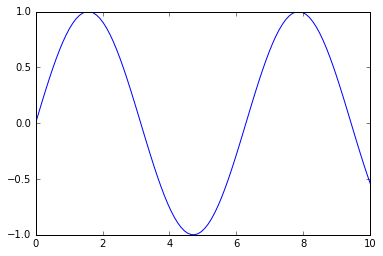

In [55]:
xs = np.linspace(0,10,100)
ys = np.sin(xs)

plt.plot(xs, ys)

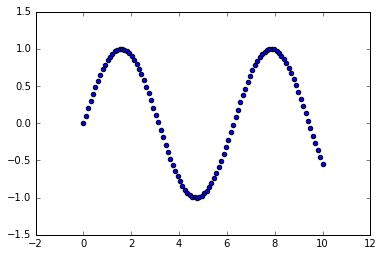

In [56]:
plt.scatter(xs, ys)

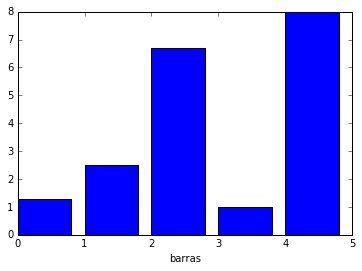

In [57]:
heights = [1.3, 2.5, 6.7, 1, 8]

plt.bar(range(5),heights)

plt.xlabel('barras')



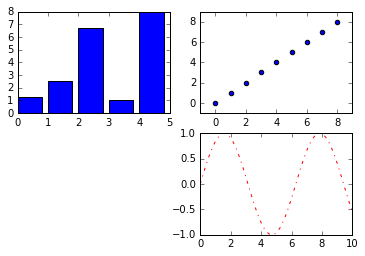

In [58]:
plt.subplot(221) #2 filas, 2 columnas, primer gráfico.
plt.bar(range(5),heights)
plt.subplot(222)
plt.scatter(range(9), range(9))
plt.subplot(224)
plt.plot(xs, ys, 'r-.')
plt.show()

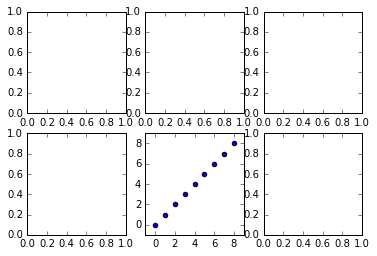

In [59]:
f, axarray = plt.subplots(2,3)
axarray[1][1].scatter(range(9), range(9))

(-100, 500)

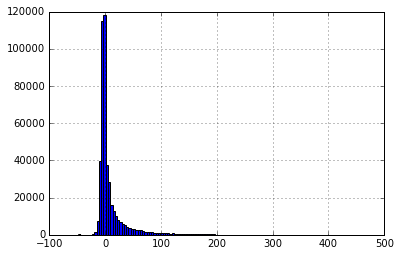

In [60]:
ax = df['DepDelay'].hist(bins = 500)

ax.set_xlim(-100, 500)

Awesome! now, let's look at the average delay of the planes with some departures (let's say, at least 15)

## Plotting

There are several ways in which we could go about this. This is where creativity starts. We'll do a couple very simple plots.

For example, do the delays have a relationship with the number of departures a plane does?

(0, 200)

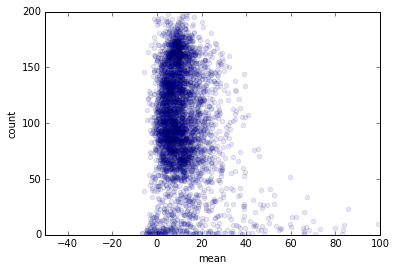

In [61]:
# Do a scatter plot with matplotlib. Check the documentation

ax = delays.plot.scatter('mean', 'count', alpha = .1)
ax.set_xlim(-50,100)
ax.set_ylim(0,200)

(0, 200)

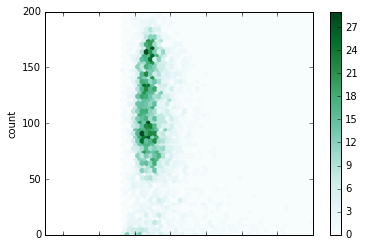

In [62]:
ax = delays.plot.hexbin('mean', 'count')
ax.set_xlim(-50,100)
ax.set_ylim(0,200)

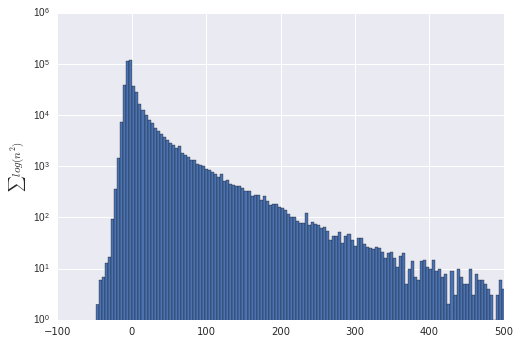

In [70]:
import seaborn as sns
ax = df['DepDelay'].hist(bins = 500)

ax.set_xlim(-100, 500)
plt.yscale('log')
#plt.ylabel(r'$\sum log(n^2)$')

# Latex

$asl = x$

 Another question: how do the delays stack over the course of the day?

In [64]:
# Pro: Try to do a boxplot with matplotlib.

In [71]:
#Los boxplots nos permiten comparar distribuciones

In [ ]:
#Usar los colores sólo para categorias. a los humanos no se nos da bien distinguir colores. 
#En orden de mejor skill, tamaños, posiciones...

In [72]:
df.sample(3)

,FlightDate,DayOfWeek,Carrier,TailNum,FlightNum,Origin,OriginCityName,OriginStateName,Dest,DestCityName,DestStateName,DepTime,DepDelay,AirTime,Distance,DepTimeStr,DepDateTime
274701,2015-01-11,7,OO,N916SW,5578,SJC,"San Jose, CA",California,DEN,"Denver, CO",Colorado,943.0,143.0,132.0,948.0,09:43,2015-01-11 09:43:00
116185,2015-01-22,4,DL,N821DN,2124,MSY,"New Orleans, LA",Louisiana,ATL,"Atlanta, GA",Georgia,710.0,-5.0,59.0,425.0,07:10,2015-01-22 07:10:00
258007,2015-01-13,2,OO,N630SK,4453,LAX,"Los Angeles, CA",California,OAK,"Oakland, CA",California,1553.0,8.0,57.0,337.0,15:53,2015-01-13 15:53:00


In [74]:
datetime = pd.to_datetime('2015-01-11 09:43:00')

In [76]:
datetime.hour

9

In [81]:
by_hour = df.groupby(lambda ix: df.iloc[ix]['DepDateTime'].hour)

In [82]:
delays, hours = [], []
for hour, hourly_df in by_hour:
    delays.append(hourly_df['DepDelay'])
    hours.append(hour)    

In [85]:
delays[0].head(3)

345     69.0
816     37.0
1001    -6.0
Name: DepDelay, dtype: float64

In [86]:
df.ix[1001]

FlightDate                  2015-01-23
DayOfWeek                            5
Carrier                             AA
TailNum                         N3DCAA
FlightNum                          115
Origin                             LAX
OriginCityName         Los Angeles, CA
OriginStateName             California
Dest                               MIA
DestCityName                 Miami, FL
DestStateName                  Florida
DepTime                             59
DepDelay                            -6
AirTime                            265
Distance                          2342
DepTimeStr                       00:59
DepDateTime        2015-01-23 00:59:00
Name: 1001, dtype: object

(-50, 200)

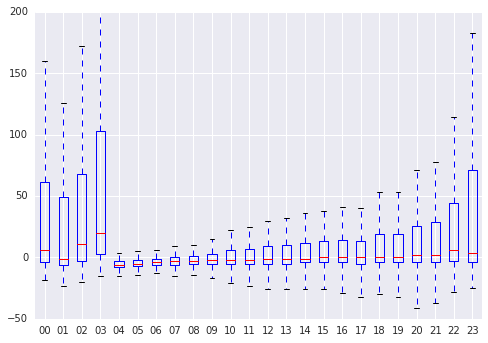

In [95]:
labels = map(lambda f: '%02d' % f, hours)

_ = plt.boxplot(delays, labels = labels, positions = hours)

plt.ylim(-50, 200)

Hints for reading large files: 
* selecting columns:
    `pd.read_csv(usecols=[list_of_interesting_column_names])`
* bcolz
* specify column types